# HW1 - Lorenzo Mazzocco

.

# QUESTION 1

Since I have OpenMC already installed and very little space on my PC I'll use my research setup with ENDF8.

In [95]:
import openmc

In [96]:
filepath = '/Users/lorenzomazzocco/openmc/endfb80_hdf5/U235.h5'
u235_ace = openmc.data.IncidentNeutron.from_hdf5(filepath)

In [97]:
fission = u235_ace[18] #18 is fission
print("The fission Q-value for U235 in ENDF8 is: {} eV".format(fission.q_value))

The fission Q-value for U235 in ENDF8 is: 193405400.0 eV


.

# QUESTION 2

In [98]:
import random
import matplotlib.pyplot as plt


p = 0.5    # probability of win
bet = 1    # bet in $
n = 10     # number of games

games = []

for game in range(n):
    random.seed(game*50000000) # set new seed with big differences
    money = 100 # initial bettor money
    mm = []

    while money > 0:
        r = random.uniform(0,1)
        if r <= p:
            money = money+bet
        else:
            money = money-bet
        mm.append(money)
    games.append(mm)


5720


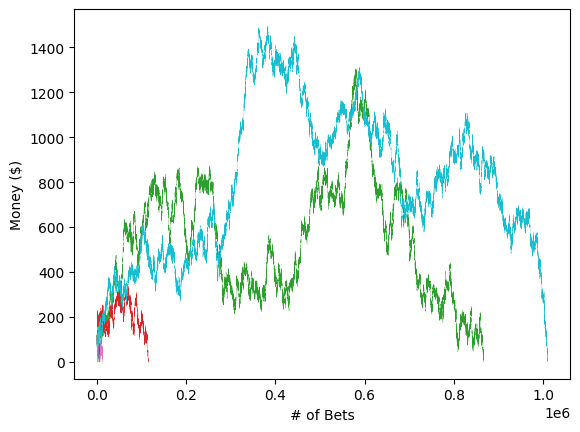

In [99]:
print(len(games[0]))
    
for game in games:
    plt.plot(range(1,len(game)+1), game, linewidth=0.2)
plt.xlabel("# of Bets")
plt.ylabel("Money ($)")
plt.show()

In [100]:
print("{:<13}{:<20}{}".format("GAME N.", "MAX MONEY ($)", "NUMBER OF BETS"))

for i in range(len(games)):
    game = games[i]
    print("{:<2}{:<15}{:<20}{:,}".format("", i+1, max(game), len(game)))


GAME N.      MAX MONEY ($)       NUMBER OF BETS
  1              128                 5,720
  2              134                 5,278
  3              1305                867,504
  4              338                 114,900
  5              109                 5,338
  6              137                 9,016
  7              144                 13,386
  8              104                 2,438
  9              116                 2,010
  10             1495                1,010,954


From the process simulated its evident that the probability of eventually losing all of your money is 1. This is because this process is a random walk in 1D which is bounded on one side (at 0$), eventually we will reach that point even if the game has no upper bound.

.

# QUESTION 3

In the ENDF6 format information about resonances is contained in MF=2 MT=151 (https://www-nds.iaea.org/exfor/servlet/E4sGetIntSection?SectID=9025224&req=3871&e4up=0&PenSectID=13662977&pen=0). In this file one can distinguish different sections, the resolved resonance region (RRR) signaled by LRU=1 and the unresolved resonance region (URR) signaled by LRU=2.

In the case of U-238 ENDF/B-VIII one can look at file MF=1 MT=451 to confirm that each resolved resonance is represented using Reich-Moore model (in fact LFR=3). 

The RRR (called "Energy Region 1") goes from 1e-5 eV to 20 keV.
To check how many resonances where tabulated in the ENDF/B-VIII file I copied and pasted both the section for L=0 and the one for L=1.

In [101]:
import numpy as np
import matplotlib.pyplot as plt

RRR_E_min = 1e-5
RRR_E_max = 2e4

rr_l0 = []
rr_l0_external = 0
rr_l0_internal = 0

with open('resonances_l0.txt') as f:
    lines = f.readlines()
    
for line in lines:
    parameters = line.split()
    if parameters[0][0] == '-': # exclude negative resonances and count them as external
        rr_l0_external += 1
    else:
        rr_l0.append(parameters[0])

# convert positive L0 to numbers
rr_l0_num = []

for E0 in rr_l0:
    num = float(E0.split("+")[0])
    exp = int(E0.split("+")[1])
    final = num*(10**(exp))
    if (final < RRR_E_min) | (final > RRR_E_max):
        rr_l0_external += 1
    else:
        rr_l0_num.append(final)

In [102]:
rr_l1 = []
rr_l1_external = 0
rr_l1_internal = 0

with open('resonances_l1.txt') as f:
    lines = f.readlines()
    
for line in lines:
    parameters = line.split()
    if parameters[0][0] == '-': # exclude negative resonances and count them as external
        rr_l1_external += 1
    else:
        rr_l1.append(parameters[0])

# convert positive L0 to numbers
rr_l1_num = []

for E0 in rr_l1:
    num = float(E0.split("+")[0])
    exp = int(E0.split("+")[1])
    final = num*(10**(exp))
    if (final < RRR_E_min) | (final > RRR_E_max):
        rr_l1_external += 1
    else:
        rr_l1_num.append(final)

In [103]:
rr_l0_internal = len(rr_l0_num)
rr_l1_internal = len(rr_l1_num)
RRR_resonances = rr_l0_internal+rr_l1_internal

In [104]:
print("RR L0 EXT: {}".format(rr_l0_external))
print("RR L0 INT: {}".format(rr_l0_internal))
print("RR L1 EXT: {}".format(rr_l1_external))
print("RR L1 INT: {}".format(rr_l1_internal))
print("U238 TOTAL VALID RESOLVED RESONANCES: {}".format(RRR_resonances))

RR L0 EXT: 31
RR L0 INT: 895
RR L1 EXT: 2
RR L1 INT: 2417
U238 TOTAL VALID RESOLVED RESONANCES: 3312


So the total number of U238 resolved resonances is 3312.

.

The URR (called "Energy Region 2") goes from 20 keV to 0.1490087 MeV.
We can infere the number of resonances in the URR by knowing that **approximately** the linear distance between two resonances is constant. So we can approximate the "resonance density" of the two regions to be the same. With this method one gets:

In [105]:
RRR_range = 2E+4 - 1E-5
URR_range = 1.490087E+5 - 2E+4

resonance_density = RRR_resonances/RRR_range

URR_resonances = round(resonance_density*URR_range)
total_resonances = RRR_resonances+URR_resonances

In [106]:
print("Estimated number of resonances in URR: {}".format(URR_resonances))
print("Estimated total number of resonances: {}".format(total_resonances))

Estimated number of resonances in URR: 21364
Estimated total number of resonances: 24676


.

.

.

.

## BONUS
We are going to check how good is the assumption that the distance between resonances in the RRR is somewhat constant by plotting the distribution of distances.

In [107]:
# Sort all the L0 and L1 resonances from E0 smaller to bigger

rr_num = []
for i in rr_l0_num:
    rr_num.append(i)
for i in rr_l1_num:
    rr_num.append(i)

rr_num.sort()

In [108]:
diff = np.diff(rr_num)

In [109]:
print("MEAN: {}".format(np.mean(diff)))
print("STD: {}".format(np.std(diff)))
print("MAX: {}".format(np.max(diff)))

MEAN: 6.036889919661733
STD: 4.3490744152964265
MAX: 32.45000000000255


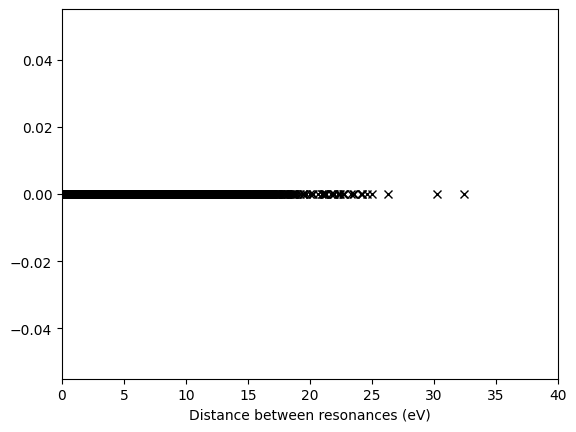

In [110]:
val = 0. # this is the value where you want the data to appear on the y-axis.
plt.plot(diff, np.zeros_like(diff) + val, 'x', color='k') 
plt.xlim(0,40)
plt.xlabel("Distance between resonances (eV)")
plt.show()

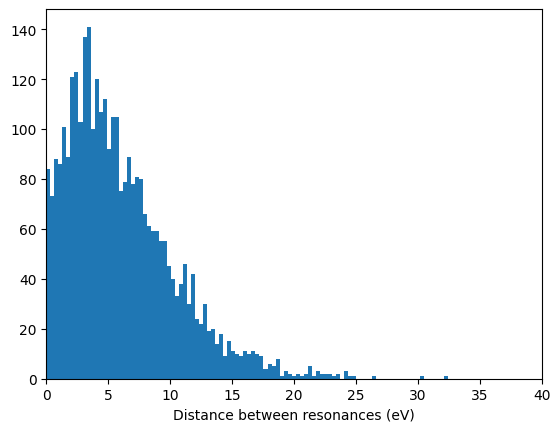

In [111]:
plt.hist(diff, bins=100) 
plt.xlim(0,40)
plt.xlabel("Distance between resonances (eV)")
plt.show()

.

Overall the distribution confirms that approximating the distance between resonances as constant is acceptable.